# Import Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
import pickle
sns.set_theme(style="darkgrid")
%matplotlib inline

# Data

## Collection

In [5]:
# load data to a pandas dataframe
df = pd.read_csv("dataset/heart_cleveland.csv")

In [6]:
# view the content of the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Analysis

In [7]:
# shape of the data
df.shape

(297, 14)

In [8]:
# basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


**Inference: There are no null values in the data.**

In [9]:
# check for duplicate rows
df.duplicated().sum()

0

**Inference: There are no duplicate rows in the dataset**

In [10]:
# statistical info
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


## Explore with visuals

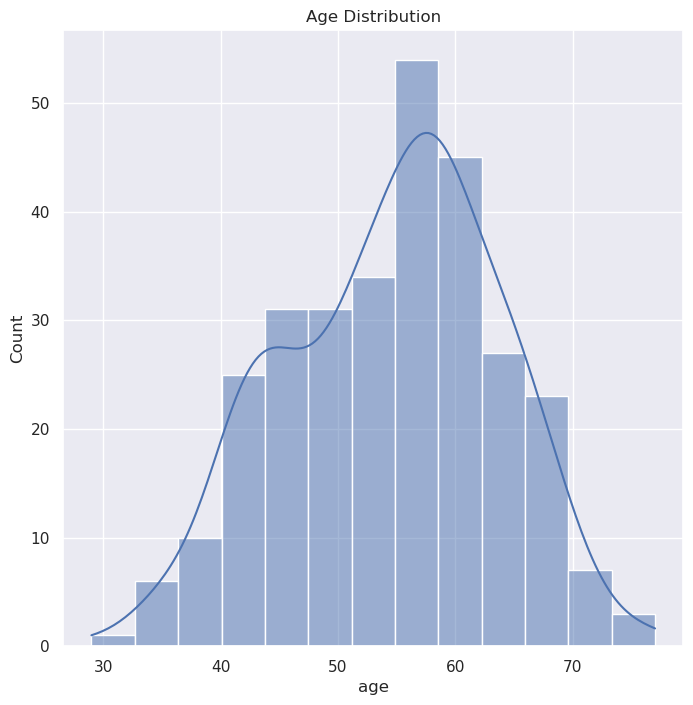

In [11]:
# distribution of age
plt.figure(figsize=(8,8))
plt.title("Age Distribution")
sns.histplot(data=df, x='age', kde=True)
plt.show()

**Inference: Majority of people lie between 50 to 60 years of age.**

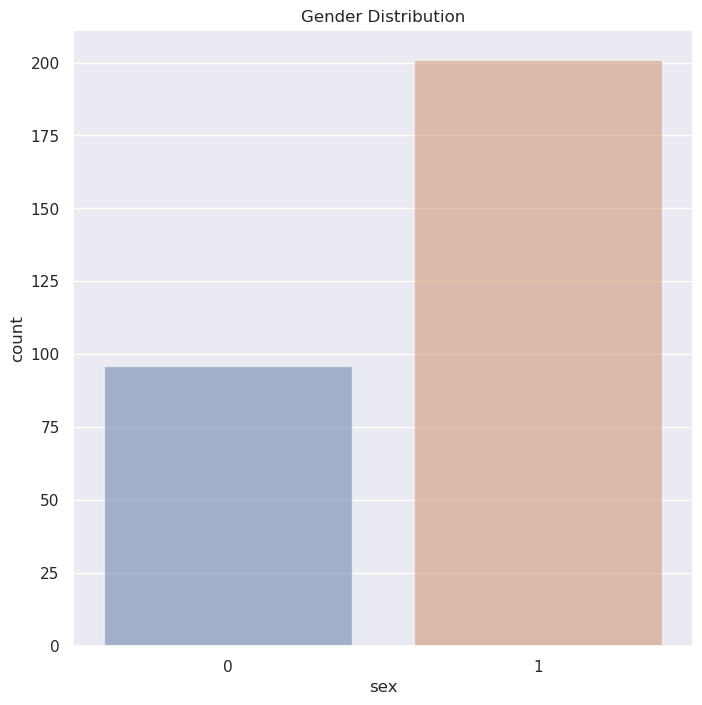

In [12]:
# distribution of gender
plt.figure(figsize=(8,8))
plt.title("Gender Distribution")
sns.countplot(data=df, x='sex', alpha=0.5)
plt.show()

**Inference: There are more males(1) than females(0).**

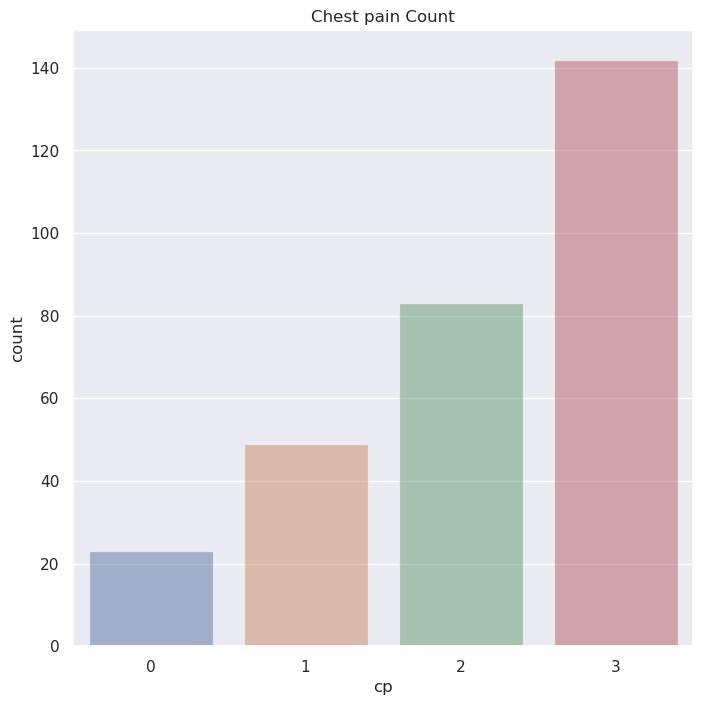

In [13]:
# count of cp
plt.figure(figsize=(8,8))
plt.title("Chest pain Count")
sns.countplot(data=df, x='cp', alpha=0.5)
plt.show()

**Inference: We observe a gradual increase from CP 0 to 3**

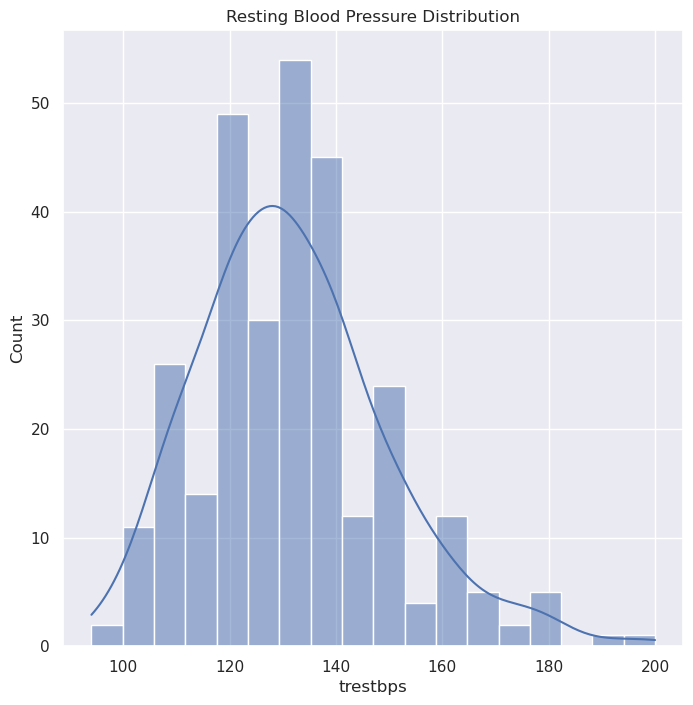

In [14]:
# distribution of resting blood pressure
plt.figure(figsize=(8,8))
plt.title("Resting Blood Pressure Distribution")
sns.histplot(data=df, x='trestbps', kde=True)
plt.show()

**Inference: The resting blood pressure lies between 120-140 majorly.**

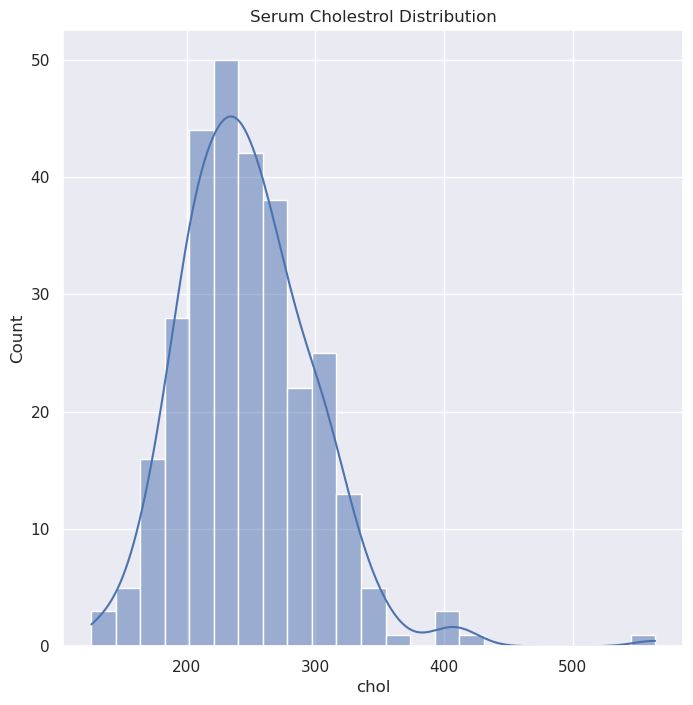

In [15]:
# distribution of Serum Cholestrol
plt.figure(figsize=(8,8))
plt.title("Serum Cholestrol Distribution")
sns.histplot(data=df, x='chol', kde=True)
plt.show()

**Inference: Serum Cholestrol majorly lies between 200-300**

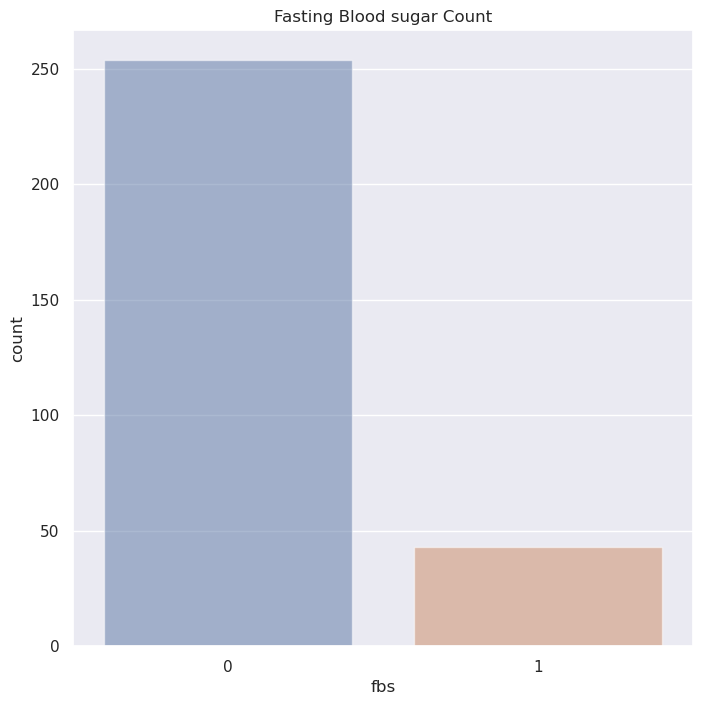

In [16]:
# count of fasting blood sugar
plt.figure(figsize=(8,8))
plt.title("Fasting Blood sugar Count")
sns.countplot(data=df, x='fbs', alpha=0.5)
plt.show()

**Inference: The fasting blood sugar is less than 120 mg/dl for majority of people.**

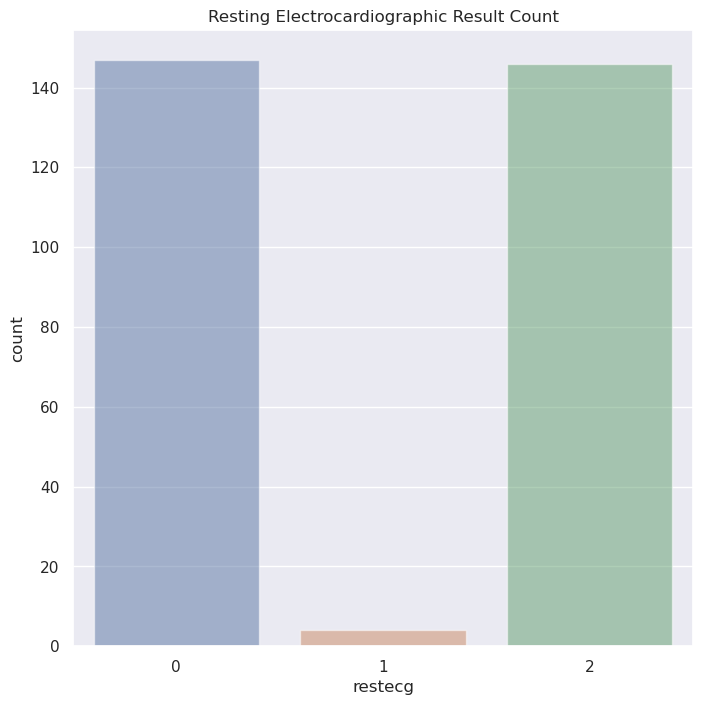

In [17]:
# count of resting electrocardiographic results
plt.figure(figsize=(8,8))
plt.title("Resting Electrocardiographic Result Count")
sns.countplot(data=df, x='restecg', alpha=0.5)
plt.show()

**Resting Electrocardiographic Result**

0: normal

1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**Inference: Very low count for category 1 but similar distribution for 0 and 2 categories.**

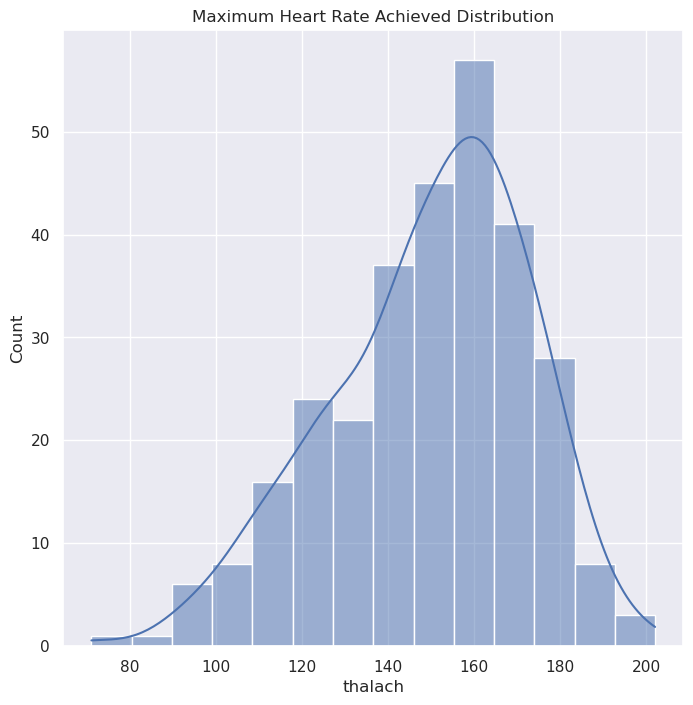

In [18]:
# distribution of Maximum Heart Rate Achieved
plt.figure(figsize=(8,8))
plt.title("Maximum Heart Rate Achieved Distribution")
sns.histplot(data=df, x='thalach', kde=True)
plt.show()

**Inference: The Maximum Heart Rate Achieved is around 160.**

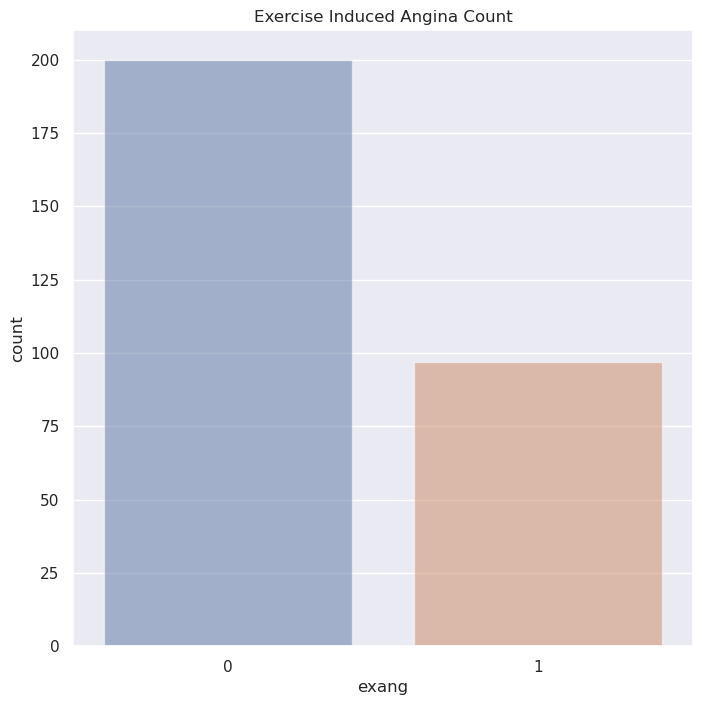

In [19]:
# count of exercise induced angina
plt.figure(figsize=(8,8))
plt.title("Exercise Induced Angina Count")
sns.countplot(data=df, x='exang', alpha=0.5)
plt.show()

**Inference: Very few people are having exercise induced angina**

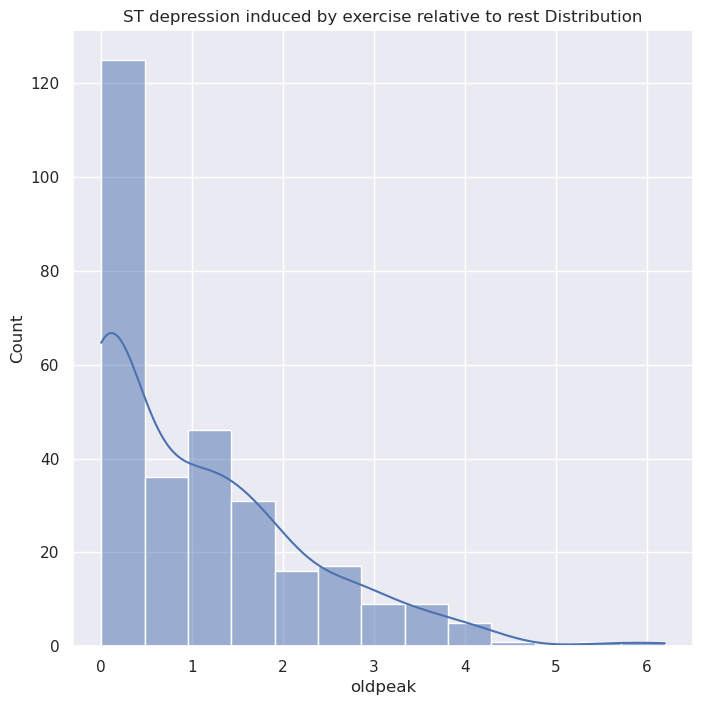

In [20]:
# distribution of ST depression induced by exercise relative to rest
plt.figure(figsize=(8,8))
plt.title("ST depression induced by exercise relative to rest Distribution")
sns.histplot(data=df, x='oldpeak', kde=True)
plt.show()

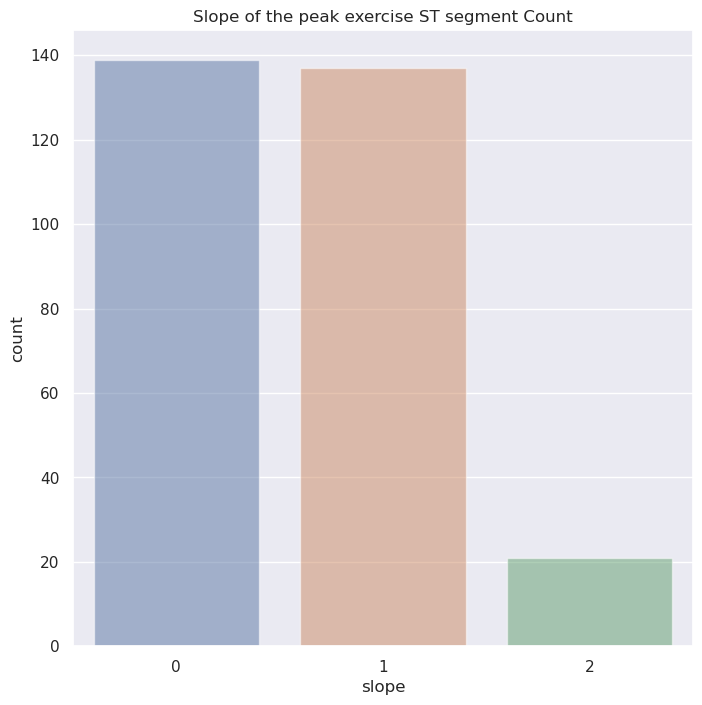

In [21]:
# count of slope of the peak exercise ST segment
plt.figure(figsize=(8,8))
plt.title("Slope of the peak exercise ST segment Count")
sns.countplot(data=df, x='slope', alpha=0.5)
plt.show()

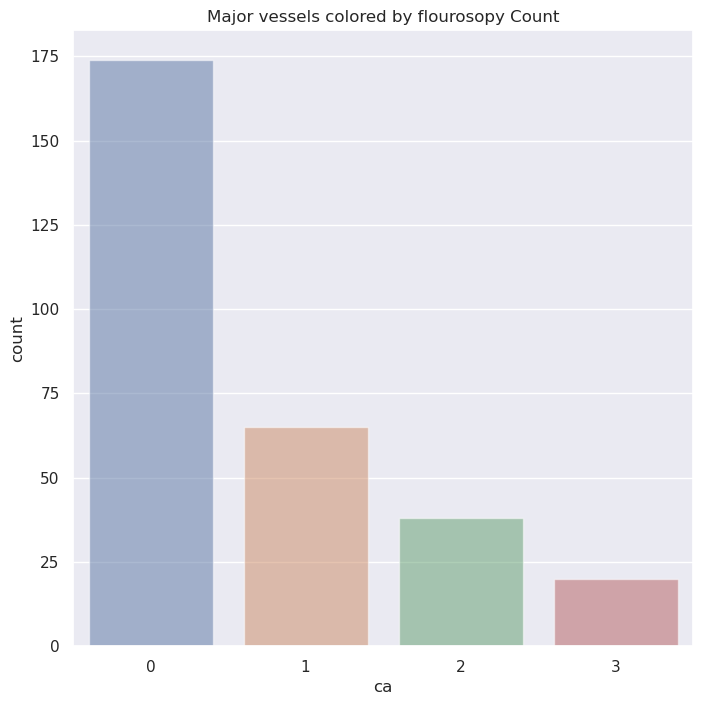

In [22]:
# count of Major vessels colored by flourosopy
plt.figure(figsize=(8,8))
plt.title("Major vessels colored by flourosopy Count")
sns.countplot(data=df, x='ca', alpha=0.5)
plt.show()

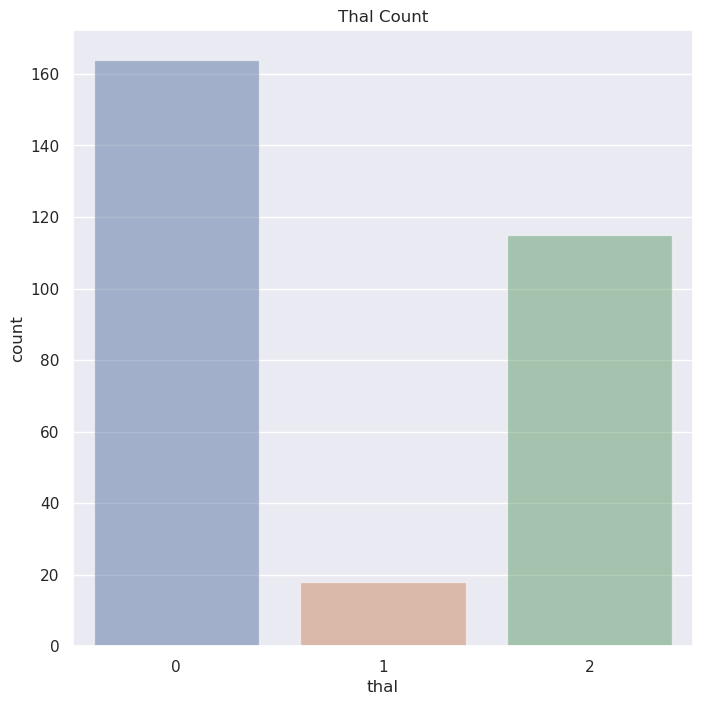

In [23]:
# count of thal
plt.figure(figsize=(8,8))
plt.title("Thal Count")
sns.countplot(data=df, x='thal', alpha=0.5)
plt.show()

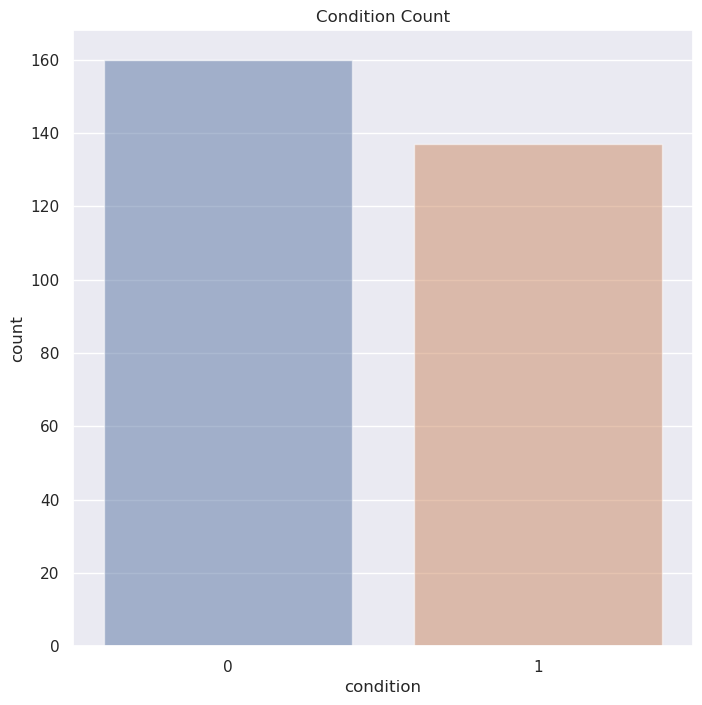

In [24]:
# count of condition
plt.figure(figsize=(8,8))
plt.title("Condition Count")
sns.countplot(data=df, x='condition', alpha=0.5)
plt.show()

**Inference: We have almost equal distribution of people with no heart disease and people having it.**

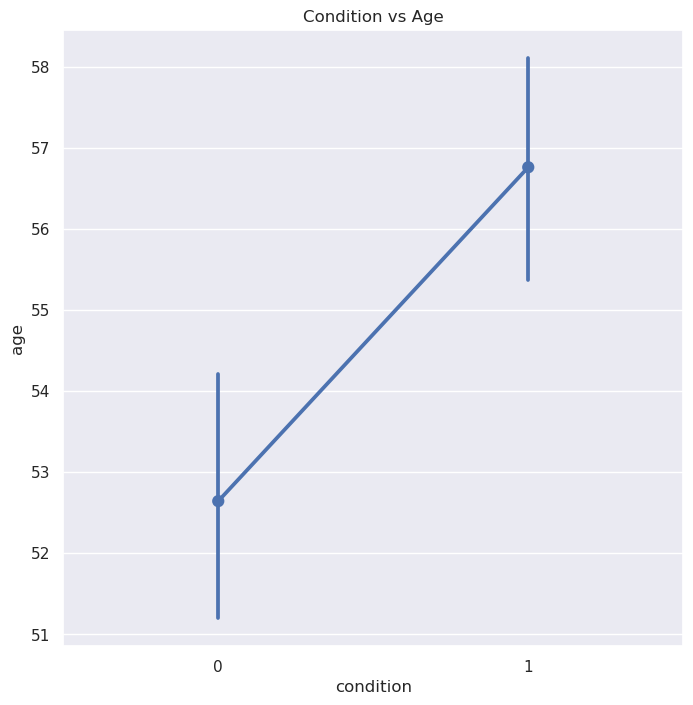

In [25]:
# Condition vs Age
plt.figure(figsize=(8,8))
plt.title("Condition vs Age")
sns.pointplot(data=df, x='condition', y='age')
plt.show()

**Inference: We observe that people of older age tend to be at higher risk of heart disease.**

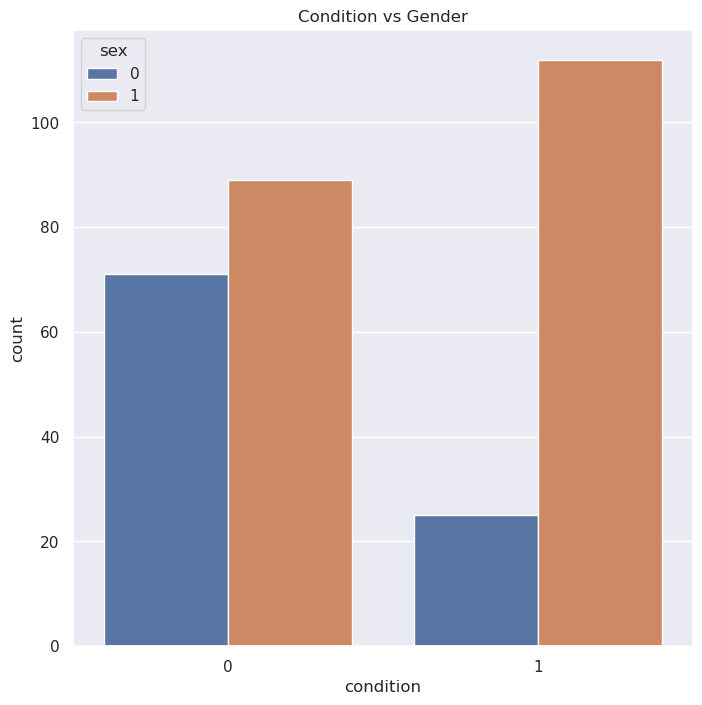

In [26]:
# Condition vs Gender
plt.figure(figsize=(8,8))
plt.title("Condition vs Gender")
sns.countplot(data=df, x='condition', hue='sex')
plt.show()

**Inference: Males (1) appear to be at a higher risk than females(0).**

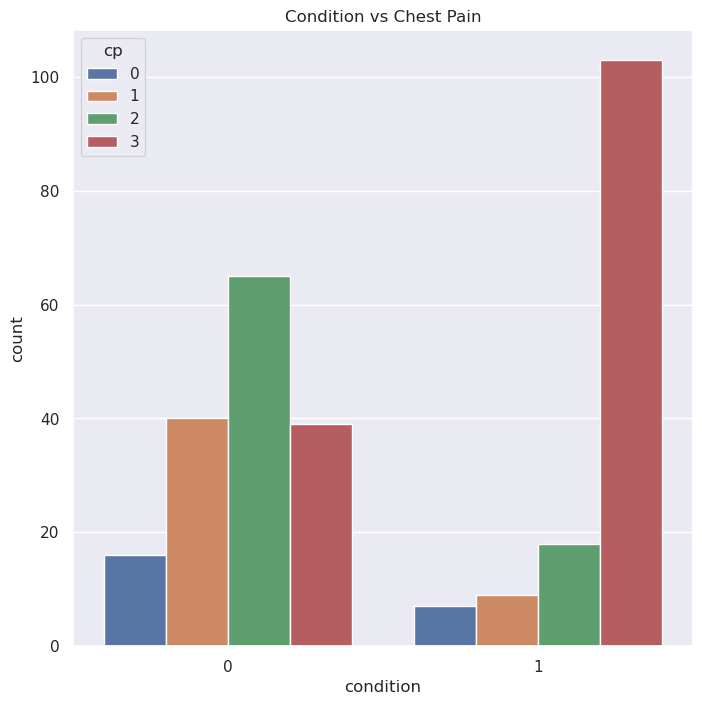

In [27]:
# Condition vs Chest Pain
plt.figure(figsize=(8,8))
plt.title("Condition vs Chest Pain")
sns.countplot(data=df, x='condition', hue='cp')
plt.show()

**Inference: A person having Chest pain is having a higher risk of heart disease.**

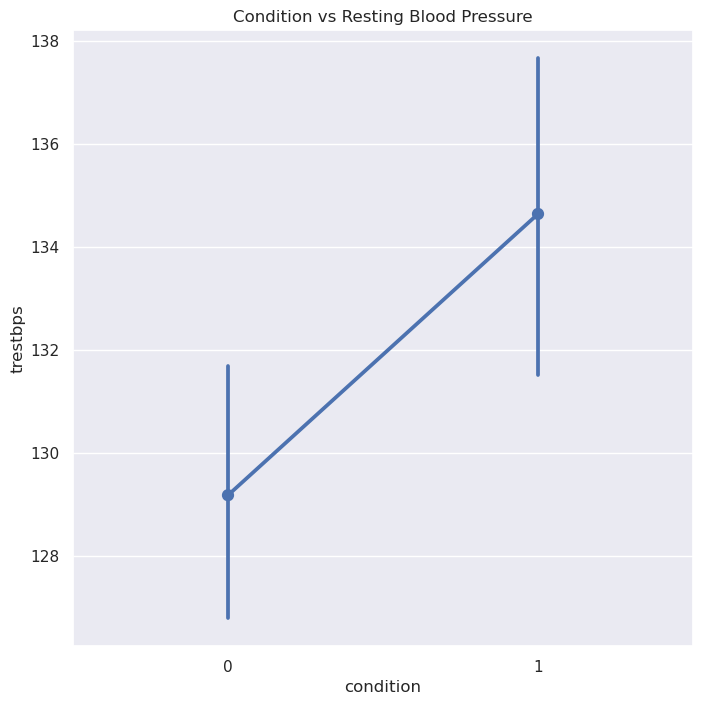

In [28]:
# Condition vs Resting Blood Pressure
plt.figure(figsize=(8,8))
plt.title("Condition vs Resting Blood Pressure")
sns.pointplot(data=df, x='condition', y='trestbps')
plt.show()

**Inference: Having a high resting blood pressure means that a person is at higher risk.**

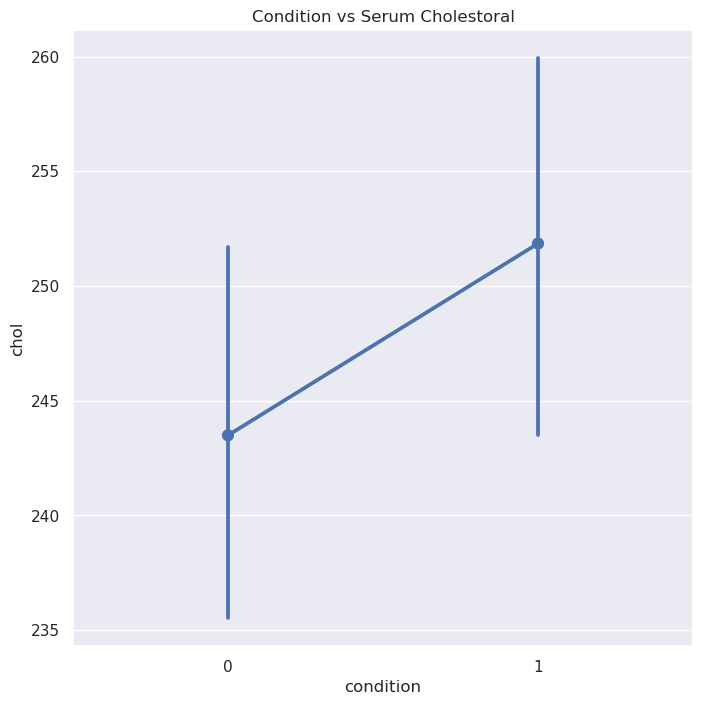

In [29]:
# Condition vs Serum Cholestoral
plt.figure(figsize=(8,8))
plt.title("Condition vs Serum Cholestoral")
sns.pointplot(data=df, x='condition', y='chol')
plt.show()

**Inference: Having a high Serum Cholestoral means that a person is at higher risk.**

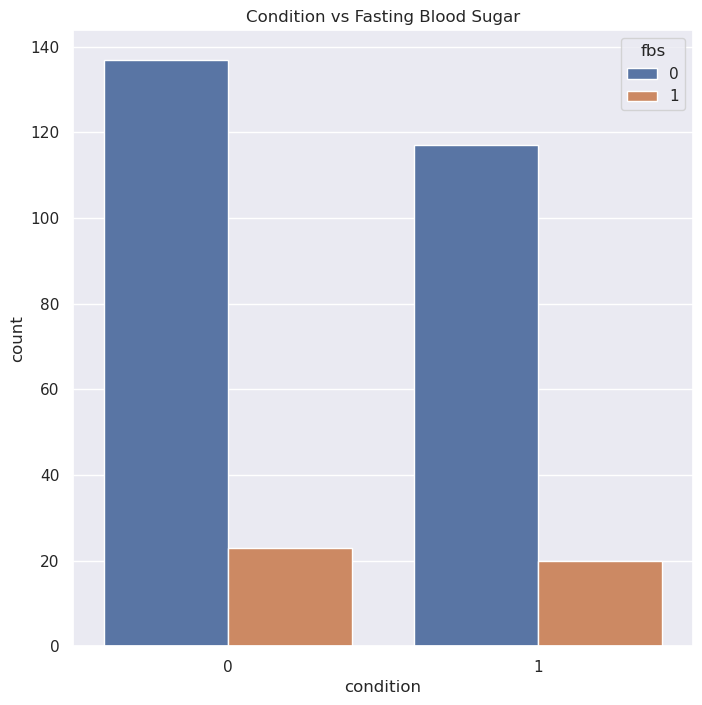

In [30]:
# Condition vs Fasting Blood Sugar
plt.figure(figsize=(8,8))
plt.title("Condition vs Fasting Blood Sugar")
sns.countplot(data=df, x='condition', hue='fbs')
plt.show()

**Inference: People having Fasting Blood Sugar < 120 mg/dl  are at greater risk.**

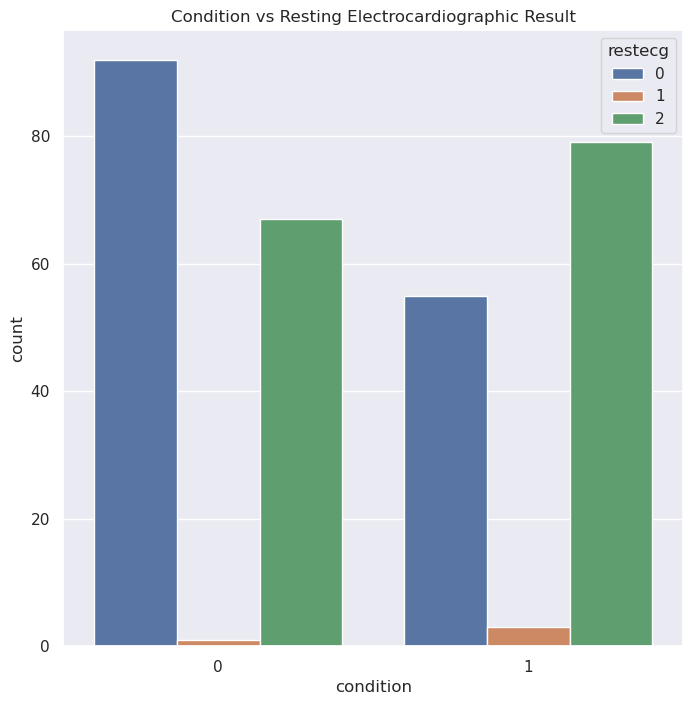

In [31]:
# Condition vs Resting Electrocardiographic Result
plt.figure(figsize=(8,8))
plt.title("Condition vs Resting Electrocardiographic Result")
sns.countplot(data=df, x='condition', hue='restecg')
plt.show()

**Inference: People having ECG of Category 2 tend to be at higher risk.**

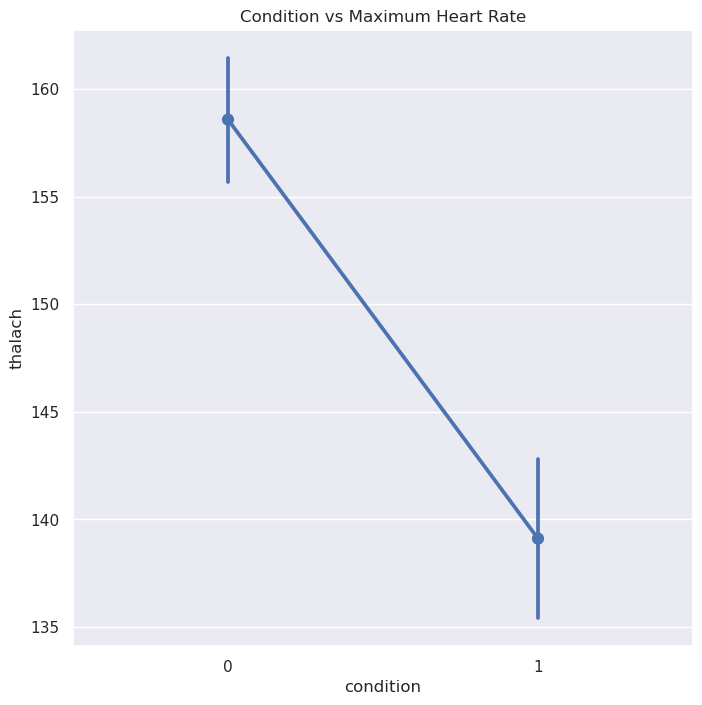

In [32]:
# Condition vs maximum heart rate
plt.figure(figsize=(8,8))
plt.title("Condition vs Maximum Heart Rate")
sns.pointplot(data=df, x='condition', y='thalach')
plt.show()

**Inference: People having lower heart rate tend to be at higher risk.**

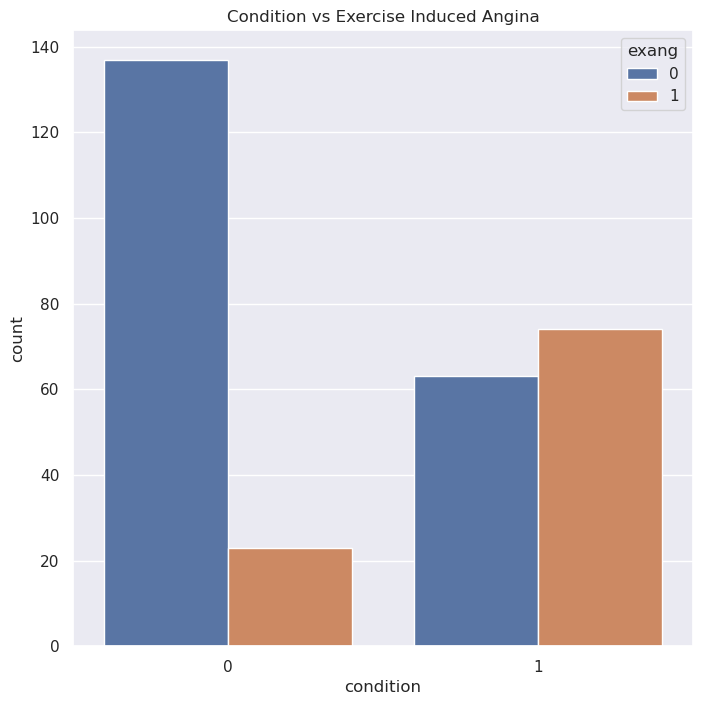

In [33]:
# Condition vs Exercise Induced Angina
plt.figure(figsize=(8,8))
plt.title("Condition vs Exercise Induced Angina")
sns.countplot(data=df, x='condition', hue='exang')
plt.show()

**Inference: People having Exercise Induced Angina are at higher risk.**

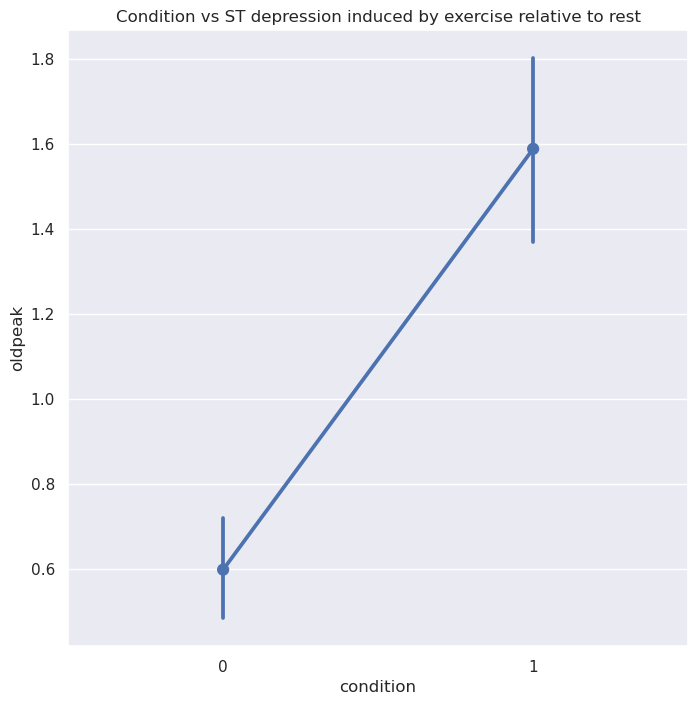

In [34]:
# Condition vs ST depression induced by exercise relative to rest
plt.figure(figsize=(8,8))
plt.title("Condition vs ST depression induced by exercise relative to rest")
sns.pointplot(data=df, x='condition', y='oldpeak')
plt.show()

**Inference: People having high ST depression induced by exercise relative to rest are at greater risk.**

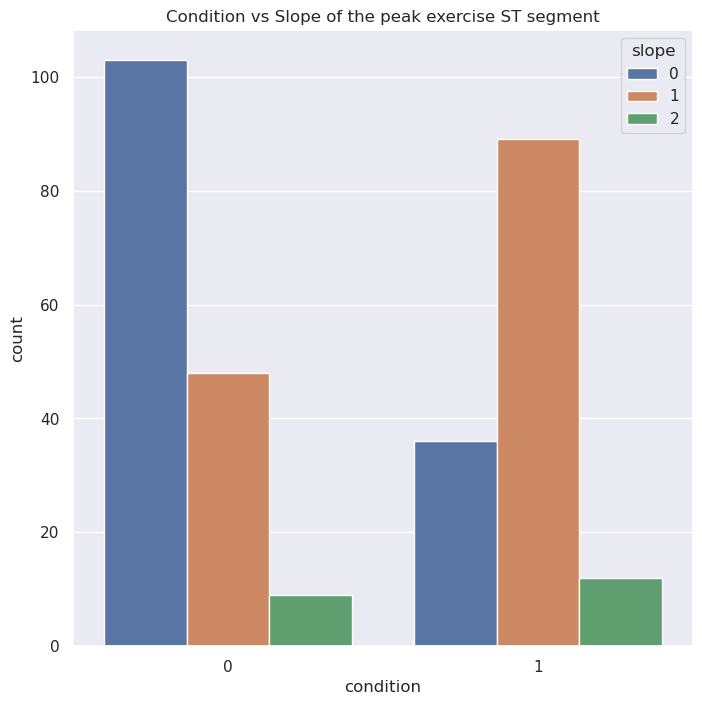

In [35]:
# Condition vs slope of the peak exercise ST segment
plt.figure(figsize=(8,8))
plt.title("Condition vs Slope of the peak exercise ST segment")
sns.countplot(data=df, x='condition', hue='slope')
plt.show()

**Inference: People of Category 1 slope tend to be at higher risk.**

## Preprocessing

In [36]:
# splitting the features and target

X = df.drop(columns="condition", axis=1)
Y = df['condition']

# Model

## Splitting the data to testing and training

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

In [38]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(297, 13) (237, 13) (60, 13)
(297,) (237,) (60,)


## Training (Logistic Regression)

In [39]:
model = LogisticRegression(max_iter=1000)

In [40]:
# train the model
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [41]:
# preiction for training data
training_data_predictions = model.predict(X_train)

In [42]:
# preiction for test data
test_data_predictions = model.predict(X_test)

## Evaluation on Training Data

In [43]:
print(f"The accuracy score on training data is : {round(accuracy_score(training_data_predictions, Y_train),2)}")

The accuracy score on training data is : 0.87


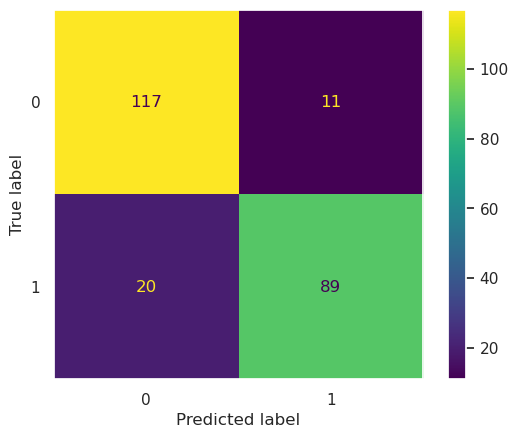

In [44]:
# confusion matrix
sns.set_theme(style="dark")
cf_matrix_train = confusion_matrix(Y_train, training_data_predictions)
cm_display_train = ConfusionMatrixDisplay(cf_matrix_train).plot()

In [45]:
# precision
precision_train = precision_score(Y_train, training_data_predictions)
print(f"The precision on training data is : {round(precision_train, 2)}")

The precision on training data is : 0.89


In [46]:
# recall
recall_train = recall_score(Y_train, training_data_predictions)
print(f"The recall on training data is : {round(recall_train, 2)}")

The recall on training data is : 0.82


## Evaluation on Test Data

In [47]:
print(f"The accuracy score on test data is : {round(accuracy_score(test_data_predictions, Y_test),2)}")

The accuracy score on test data is : 0.9


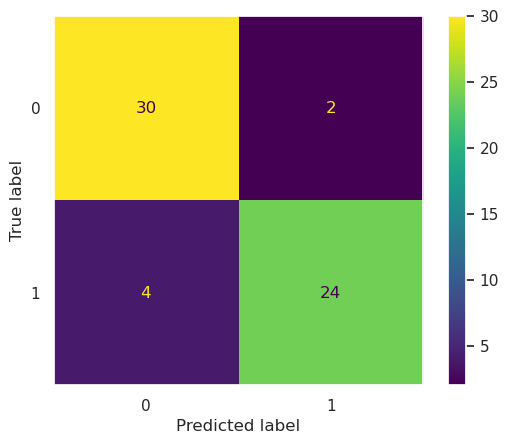

In [48]:
# confusion matrix

cf_matrix_test = confusion_matrix(Y_test, test_data_predictions)
cm_display_test = ConfusionMatrixDisplay(cf_matrix_test).plot()

In [49]:
# precision
precision_test = precision_score(Y_test, test_data_predictions)
print(f"The precision on test data is : {round(precision_test, 2)}")

The precision on test data is : 0.92


In [50]:
# recall
recall_test = recall_score(Y_test, test_data_predictions)
print(f"The recall on test data is : {round(recall_test, 2)}")

The recall on test data is : 0.86


## Export the model

In [51]:
model_path = "saved_model/heart_disease_model.sav"
pickle.dump(model, open(model_path, "wb"))